# Регрессируем $f(x) = 2^x \sin(2^{-x})$

In [0]:
import torch
import matplotlib.pyplot as plt

In [0]:
class RegressionNet(torch.nn.Module):
    def __init__(self, n1, n2):
        """Ну вот просто такая архитектура"""
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n1)
        self.act1 = torch.nn.Sigmoid()
        
        self.fc2 = torch.nn.Linear(n1, n2)
        self.act2 = torch.nn.Sigmoid()
        
        self.fc3 = torch.nn.Linear(n2, 1)
        self.act3 = torch.nn.Tanh()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x
    
    def fit(self, X_train, y_train):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01)
        
        for epoch_index in range(2000):
            optimizer.zero_grad()

            y_pred = net.forward(X_train)
            loss_value = self.loss(y_pred, y_train)
    
            loss_value.backward()
            optimizer.step()
            
        return self
    
    def predict(self, x):
        y_pred = self.forward(x)
        return y_pred
    
    @staticmethod
    def loss(pred, target):
        squares = (pred - target) ** 2
        return squares.mean()


In [0]:
net = RegressionNet(35, 10)

In [0]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

In [0]:
def metric(pred, target):
    return (pred - target).abs().mean()

In [0]:
def visual(x, y, y_pred):
    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

# Dataset preparation

In [0]:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Training

In [37]:
net.fit(x_train, y_train)

RegressionNet(
  (fc1): Linear(in_features=1, out_features=35, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=35, out_features=10, bias=True)
  (act2): Sigmoid()
  (fc3): Linear(in_features=10, out_features=1, bias=True)
  (act3): Tanh()
)

In [38]:
metric(net.forward(x_validation), y_validation).item()

0.015385167673230171

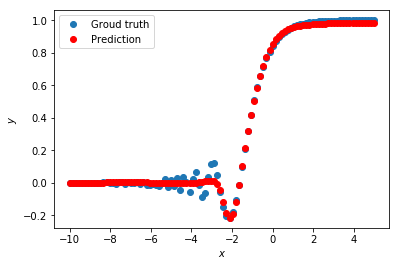

In [39]:
visual(x_validation, y_validation, net.predict(x_validation))